# Question 1

In [1]:
#blast search generated seqdump_1.txt

# Question 2

In [2]:
#%%bash
#transeq ~/Downloads/seqdump.txt > protein.fa
#mafft protein > protein_align.fa

# Question 3

In [3]:
def FASTAReader(file):
    line = file.readline()
    assert line.startswith('>'), "Not a FASTA file"
    seq_id = line[1:].rstrip('\r\n')
    sequence = []
    line = file.readline()
    sequences = []
    while line:
        if line.startswith('>'):
            sequences.append((seq_id, ''.join(sequence)))
            seq_id = line[1:].rstrip('\r\n')
            sequence = []
        else:
            sequence.append(line.strip())
        line = file.readline()
    sequences.append((seq_id, ''.join(sequence)))
    return sequences

In [4]:
aa_seq = FASTAReader(open("protein_align.fa"))
org_nuc_seq = FASTAReader(open("seqdump_1.txt"))

In [5]:
seq_dict = {}

#make dictionary with original DNA sequence(key) and amino acid sequence(value), then later append dictionary with third query sequence
for seq_id,sequence in org_nuc_seq:
    seq_id = seq_id.split()
    seq_dict[seq_id[0]] = [sequence]
    
for seq_id,sequence in aa_seq:
    seq_id = seq_id.split()
    seq_dict[seq_id[0][:-2]].append(sequence)

seq_dict["NC_001563.2"] #print first sequence
    

#need to remove ID from line in sequence
#for sequence id in fasta reader (object) 
#put into a dictionary 
#key is id with list of orignal nuc then amino acid sequence



['AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGGATTAACAACAATTAACACAGTGCGAGCTGTTTCTTGGCACGAAGATCTCGATGTCTAAGAAACCAGGAGGGCCCGGTAAAAACCGGGCTGTCAATATGCTAAAACGCGGTATGCCCCGCGGATTGTCCTTGATAGGACTAAAGAGGGCTATGCTGAGTCTGATTGACGGGAAGGGCCCAATACGTTTCGTGTTGGCTCTTTTGGCGTTTTTCAGATTCACTGCAATCGCTCCGACTCGTGCGGTGCTGGACAGATGGAGAGGCGTCAACAAACAAACAGCAATGAAGCATCTCTTGAGTTTCAAGAAAGAACTAGGAACTCTGACCAGTGCCATCAACCGCCGGAGCACAAAACAAAAGAAAAGAGGAGGCACAGCGGGCTTTACTATCTTGCTTGGGCTGATCGCCTGTGCTGGAGCTGTGACCCTCTCGAACTTCCAGGGCAAAGTGATGATGACAGTCAATGCAACCGATGTCACTGACGTGATTACCATTCCAACAGCTGCTGGGAAAAACCTGTGCATCGTAAGGGCTATGGACGTAGGATACCTTTGTGAGGATACTATCACTTATGAATGTCCGGTCCTAGCTGCTGGAAATGACCCTGAAGACATTGACTGCTGGTGCACGAAATCATCTGTTTACGTGCGCTATGGAAGATGCACAAAAACTCGGCATTCCCGTCGAAGCAGAAGGTCTCTGACAGTCCAGACACATGGAGAAAGTACACTGGCCAACAAGAAAGGAGCTTGGTTGGACAGCACAAAAGCCACGAGATATCTGGTGAAGACAGAATCATGGATACTGAGAAACCCGGGCTACGCCCTCGTTGCAGCTGTCATTGGATGGATGCTAGGAAGCAACACAATGCAACGCGTCGTGTTTGCCATTCTATTGCTCCTGGTGGCACCAGCATACAGCTTCAACTGTTTAGGAATGAGTAACAGAGACTT

In [6]:
#make list with new nucleotide sequence in it to add to dictionary from eariler 
#new_nuc_list: ""
for key, value in seq_dict.items():
    new_nuc_seq = '' 
    org_nuc_seq = value[0]
    aa_seq = value[1]
    for i,j in enumerate(aa_seq):
        if j == '-':
            new_nuc_seq +='---'#if there is a gap in the aa then add three gaps in the new nuc sequence
        else:
            new_nuc_seq += org_nuc_seq[i:(i+3)] #move to next codon in new sequence and add nucleotides from original
    
            
            
    seq_dict[key].append(new_nuc_seq)

seq_dict["NC_001563.2"] #print first sequence, printing the whole dictionary made jupyter hate me, trying to keep her happy
    


['AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGGATTAACAACAATTAACACAGTGCGAGCTGTTTCTTGGCACGAAGATCTCGATGTCTAAGAAACCAGGAGGGCCCGGTAAAAACCGGGCTGTCAATATGCTAAAACGCGGTATGCCCCGCGGATTGTCCTTGATAGGACTAAAGAGGGCTATGCTGAGTCTGATTGACGGGAAGGGCCCAATACGTTTCGTGTTGGCTCTTTTGGCGTTTTTCAGATTCACTGCAATCGCTCCGACTCGTGCGGTGCTGGACAGATGGAGAGGCGTCAACAAACAAACAGCAATGAAGCATCTCTTGAGTTTCAAGAAAGAACTAGGAACTCTGACCAGTGCCATCAACCGCCGGAGCACAAAACAAAAGAAAAGAGGAGGCACAGCGGGCTTTACTATCTTGCTTGGGCTGATCGCCTGTGCTGGAGCTGTGACCCTCTCGAACTTCCAGGGCAAAGTGATGATGACAGTCAATGCAACCGATGTCACTGACGTGATTACCATTCCAACAGCTGCTGGGAAAAACCTGTGCATCGTAAGGGCTATGGACGTAGGATACCTTTGTGAGGATACTATCACTTATGAATGTCCGGTCCTAGCTGCTGGAAATGACCCTGAAGACATTGACTGCTGGTGCACGAAATCATCTGTTTACGTGCGCTATGGAAGATGCACAAAAACTCGGCATTCCCGTCGAAGCAGAAGGTCTCTGACAGTCCAGACACATGGAGAAAGTACACTGGCCAACAAGAAAGGAGCTTGGTTGGACAGCACAAAAGCCACGAGATATCTGGTGAAGACAGAATCATGGATACTGAGAAACCCGGGCTACGCCCTCGTTGCAGCTGTCATTGGATGGATGCTAGGAAGCAACACAATGCAACGCGTCGTGTTTGCCATTCTATTGCTCCTGGTGGCACCAGCATACAGCTTCAACTGTTTAGGAATGAGTAACAGAGACTT

In [7]:
print(new_nuc_seq)

---------------------------------------------------------------------------------------------------------------TTTTTGTGTGTGTGA------------------------------------------------------------------AGTGTGTGCGCGCGAGAGAGCGCT------------------CTTTTA------GCACACACG------------------------TCGCGAGATATGTGTGTCTCTCTATAAAAGAGAGAAAAAAACACC------------------------GCCCCCCCG---------TAAAAAAAAAAAAACACCCCGCGGGGGGGCGCTCTGTGT---TCACAA---ATATATATGTGCGCTCTATAAAAAAAA------------------------ATGTGCGCCCCCCCCCCGCGC---------------------------------TTGTGAGATATATAGAGGGGAGACACTCTGTGAGAAAAGAGAGAGAGGGGGGGCGCTCTATATATGTGC---CTGTGAGAGAGTGTCTCTCTGTGAGATATTTTGTGAGACACGCGGGGAGAAAAAAAAAAGAGGGGCGCCCCCCCACAAAATATATACACGCGTGTTTTTTTCTCGCGTGTGTGTGTTTTGTGGGGCGCTCTCTCTCTTTTTTTTTTGTGGGGCGCGCGTGTTTTTTTTTTTTTCTCACAGAGAGATATTTTCTCACACACTCTGTGCGCACAAAATATCTCGCGCGCTCTCTCCCCGCGAGACACTCTCTCGCGTGTGTGCGCGCGGGGTGTGTGCGCTCTGTGGGGAGACACACAGAGAGATATGTGGGGAGAGAGAGAGAGGGGCGCGCGTGTCTCACAAAACACACAAAAAAAC---CAAAAAAACACACAGAGCGCGCGAGATATGTGAGAAAAGAGCGCAC

# Question 4

In [8]:
codon = {
'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W'
}

In [37]:
dN_list = [] 
dS_list = []
codon_list = []
org_codon = seq_dict.get('NC_001563.2')[0] #making reference sequence of original sequence that has no gaps from first list in dictionary
new_codon = seq_dict.get('NC_001563.2')[2] #making reference of new nucleotide sequence with gaps from third list in dictionary
#aa_ref
#orgcodon2 = org_codon[i:(i+3)] #codon = three nucleotides 
#newcodon2 = new_codon[i:(i+3)] #codon = three nucleotides
codon_count = 0

for i in range(0, len(org_codon), 3): #iterate over codons in nucleotife sequence without gaps 
     
    #make counts forcodons, dS, and dN
    dN_count = 0
    dS_count = 0
    codon_count += 1

    if new_codon[i:(i+3)] == '---': #ignore if gaps in new sequence and do not need to compare to reference
        continue
    for key, value in seq_dict.items():
        if key == 'NC_001563.2':
            continue
        else:
            org_nuc = value[0] #only using first list in dictionary 
            #aa = value[1] #second list in dicitonary 
            new_nuc = value[2] #third list in dictionary 
           # org_nuc2 = org_nuc[i:(i+3)] #defining codon length
           # new_nuc2 = new_nuc[i:(i+3)] #defining codon length 
            
            if org_nuc[i:(i+3)] == org_codon[i:(i+3)]:
                continue
            elif org_nuc[i:(i+3)] == '---':
                continue
            elif org_nuc[i:(i+3)] == org_codon[i:(i+3)]:
                continue
            elif (new_nuc[i:(i+3)] == new_codon[i:(i+3)]): #wanted to say (new_nuc[i:(i+3)] != new_codon[i:(i+3)]) and (codon[new_nuc[i:(i+3)]] == codon[new_codon[i:(i+3)]], but the != gave an error)
                dS_count += 1
            else: #do not think this is the correct way to do the dN count, wanted to say elif: (new_nuc[i:(i+3)] != new_codon[i:(i+3)]) and (codon[new_nuc[i:(i+3)]] != codon[new_codon[i:(i+3)]], but the != gave an error)
                dN_count += 1
    codon_list.append(codon_count)
    dS_list.append(dS_count)
    dN_list.append(dN_count)


In [38]:
print(dS_list)

[2, 2, 6, 294, 290, 9, 1, 288, 280, 13, 282, 13, 291, 1, 0, 5, 1, 1, 287, 284, 286, 285, 5, 6, 289, 287, 1, 6, 298, 296, 16, 5, 6, 2, 6, 282, 22, 4, 10, 29, 40, 27, 5, 482, 3, 4, 286, 2, 8, 13, 4, 7, 290, 294, 293, 296, 293, 309, 292, 306, 285, 6, 11, 289, 25, 23, 283, 286, 303, 334, 288, 6, 2, 28, 6, 3, 7, 29, 7, 10, 10, 286, 6, 323, 334, 297, 284, 1, 277, 318, 0, 16, 297, 290, 4, 5, 1, 8, 22, 8, 2, 10, 6, 294, 294, 12, 4, 3, 84, 291, 4, 2, 0, 0, 1, 1, 4, 282, 283, 3, 292, 30, 39, 51, 25, 21, 25, 30, 5, 294, 331, 334, 328, 473, 474, 354, 1, 11, 22, 4, 287, 12, 38, 285, 43, 6, 1, 10, 20, 306, 300, 1, 5, 12, 20, 289, 286, 4, 0, 12, 13, 9, 285, 2, 13, 0, 287, 22, 279, 288, 295, 8, 0, 1, 1, 0, 3, 0, 0, 7, 5, 299, 15, 288, 290, 8, 307, 4, 5, 2, 13, 6, 289, 277, 11, 5, 288, 10, 289, 2, 4, 0, 3, 6, 66, 30, 26, 279, 290, 17, 10, 291, 16, 10, 22, 31, 4, 6, 10, 5, 295, 20, 20, 0, 2, 6, 2, 16, 2, 2, 1, 23, 86, 5, 288, 9, 285, 11, 190, 185, 50, 317, 297, 12, 16, 11, 287, 5, 290, 307, 18, 15, 2, 6

In [11]:
print(dN_list)

[661, 657, 659, 660, 652, 666, 663, 655, 669, 658, 671, 655, 662, 644, 625, 949, 666, 668, 665, 667, 669, 669, 653, 663, 665, 654, 667, 659, 657, 657, 627, 640, 656, 659, 625, 642, 641, 944, 645, 644, 901, 649, 861, 474, 665, 666, 658, 571, 664, 651, 647, 649, 667, 663, 660, 662, 645, 635, 640, 645, 671, 668, 662, 664, 646, 666, 669, 671, 656, 618, 657, 944, 954, 670, 661, 668, 647, 657, 945, 941, 666, 664, 488, 659, 662, 659, 672, 638, 677, 663, 665, 943, 638, 667, 682, 667, 669, 649, 647, 456, 935, 945, 945, 666, 640, 662, 948, 668, 816, 666, 648, 655, 867, 669, 930, 667, 666, 663, 669, 670, 661, 926, 637, 905, 929, 649, 644, 628, 666, 655, 620, 613, 622, 483, 482, 605, 956, 942, 910, 666, 667, 651, 609, 661, 636, 662, 948, 652, 654, 655, 629, 870, 952, 662, 634, 661, 649, 671, 559, 948, 661, 653, 635, 912, 676, 938, 650, 656, 659, 580, 658, 666, 664, 673, 655, 953, 923, 954, 687, 954, 950, 574, 663, 670, 669, 665, 662, 672, 672, 925, 639, 657, 669, 649, 668, 657, 660, 662, 658, 953,

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import sys

In [41]:
#calculate and make list of z scores 
D_list = np.subtract(np.array(dN_list), np.array(dS_list))
stdev = np.std(D_list)/np.sqrt(len(D_list))
Z_list = []
for i in D_list:
    Z_list.append(D_list[i]/stdev)

In [42]:
pvalue_list = []
for i in Z_list:
    pvalue.append(stats.norm.sf(abs(np.array(Z_list)))*2)

In [31]:
#ds_dn_ratio = []
#codon_list = []
#sig_list1 = []
#sig_list2 = []
#for i in range(len(dS_list)):
   # if i in dS_list == 0:
        #continue
    #else:
        #codon_list.append(i+1)
        #ds_dn_ratio.append(np.log2(dN_list[i]/(dS_list[i])))
        #if value in pvalue_list < 0.05:
            #sig_list1.append(value +1)
            #sig_list2.append(np.log2(dN_list[i]/(dS_list[i])))
   #for some reason i could not get this to work because it said I was dividing by zeron even though I tried to get for loop to ignore instances where i in dS_list = 0         

ZeroDivisionError: division by zero

In [ ]:
D_list2 = new_df.iloc[:, 3].tolist()
ste = np.std(D_list)/np.sqrt(2521)
Z_test = []
for i in D_list:
    Z_val = (i/ste)
    Z_test.append(Z_val)

pvalue_list2 = []
for i in Z_test:
    pvs = float(stats.norm.sf(abs(i))*2)
    pvalue_list2.append(pvs)

In [61]:
#ended up making pandas data frame because I couldn't get my forloop to run for getting the dN:dS so figure
new_df = pd.DataFrame()
new_df ['Codon'] = codon_list
new_df ['dS'] = dS_list
new_df ['dN'] = dN_list
new_df ['D'] = D_list
new_df ['dN:dS'] = (new_df['dN']) / (new_df ['dS'])
new_df['log dN:dS']= np.log2(new_df['dN:dS'])
new_df['P Values'] = pvalue_list2
new_df['Sig']= new_df['P Values'] < 0.05
new_df['Not Sig']= new_df['P Values'] > 0.05
new_df

,Codon,dS,dN,D,dN:dS,log dN:dS,P Values,Sig,Not Sig
0,38,2,661,659,330.500000,8.368506,0.0,True,False
1,39,2,657,655,328.500000,8.359750,0.0,True,False
2,40,6,659,653,109.833333,6.779172,0.0,True,False
3,41,294,660,366,2.244898,1.166650,0.0,True,False
4,42,290,652,362,2.248276,1.168819,0.0,True,False
...,...,...,...,...,...,...,...,...,...
2516,3650,4,987,983,246.750000,7.946906,0.0,True,False
2517,3651,4,992,988,248.000000,7.954196,0.0,True,False
2518,3652,4,984,980,246.000000,7.942515,0.0,True,False
2519,3653,20,972,952,48.600000,5.602884,0.0,True,False


/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


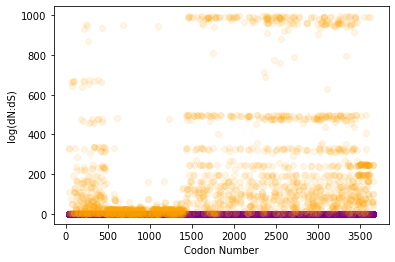

In [73]:
fig, ax = plt.subplots()
plt.scatter(new_df ['Codon'], new_df['Sig'], color = 'blue')
plt.scatter(new_df ['Codon'], new_df['Not Sig'], color = 'purple')
plt.scatter(new_df ['Codon'], new_df["dN:dS"], color = 'orange', alpha=0.1)
plt.xlabel("Codon Number")
plt.ylabel("log(dN:dS)")

fig.show()